In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import statistics
import scipy.stats as stats
import re
from datetime import datetime
from datetime import date
import random
import seaborn as sns
sns.set()

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

               Close
2020-12-21  0.002574
2020-12-22  0.004294
2020-12-23 -0.001733
2020-12-24 -0.018090
2020-12-25  0.004458
               Close
2020-12-21  1.002577
2020-12-22  1.004303
2020-12-23  0.998269
2020-12-24  0.982073
2020-12-25  1.004468
il                Close
2020-12-21  1.000000
2020-12-22  1.004303
2020-12-23  0.998269
2020-12-24  0.982073
2020-12-25  1.004468
2020-12-26  1.003750
2020-12-27  1.006679
2020-12-28  1.002450
2020-12-29  1.005324
2020-12-30  0.977266
2020-12-31  1.013293
2021-01-01  0.981413
2021-01-02  1.002523
2021-01-03  1.003565
2021-01-04  1.017471
2021-01-05  0.994419
2021-01-06  0.990660
2021-01-07  0.996453
2021-01-08  0.994320
2021-01-09  1.001434
2021-01-10  1.009594
2021-01-11  0.977280
2021-01-12  1.003485
2021-01-13  0.991561
2021-01-14  1.029031
2021-01-15  0.998431
2021-01-16  1.017144
2021-01-17  1.020495
2021-01-18  0.993458
2021-01-19  1.023061
2021-01-20  1.018920
2021-01-21  1.008518
2021-01-22  1.013035
2021-01-23  1.005143
2021-01-24

<AxesSubplot:title={'center':'Our Fake Stock Price'}>

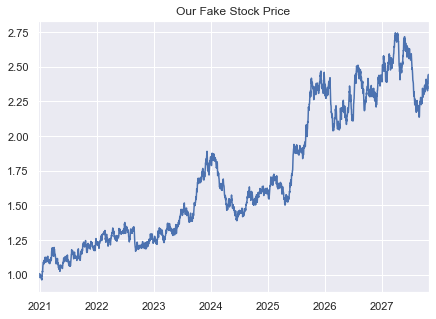

In [14]:
our_index = pd.date_range(start='2020-12-21', periods=2500, freq='D')
df = pd.DataFrame(index = our_index)
df['Close'] = np.random.normal(loc=0.0002, scale=0.011, size=2500)
print(df.head())
df['Close'] = np.exp(df['Close'])
print(df.head())
df['Close'].iloc[0] = 1
print("il",df.head(100))
df['Close'] = df['Close'].cumprod()
print(df.head(100))
df['Close'].plot(figsize=(7,5), title='Our Fake Stock Price')

<AxesSubplot:title={'center':'Our Fake Stock Price'}>

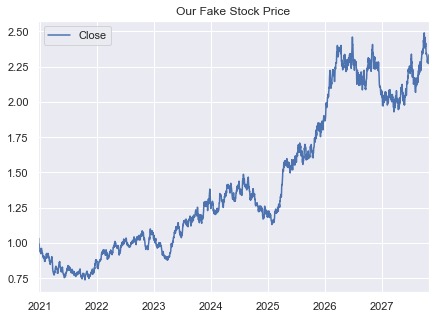

In [4]:
df[['Close']].plot(figsize=(7,5), title='Our Fake Stock Price')

In [5]:
df.columns

Index(['Close'], dtype='object')

<AxesSubplot:title={'center':'Our Fake Stock Price'}>

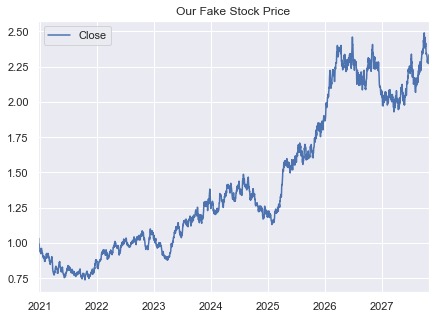

In [6]:
df['Close'].plot(figsize=(7,5), title='Our Fake Stock Price', legend=True)

Index(['Close', '100MA'], dtype='object')

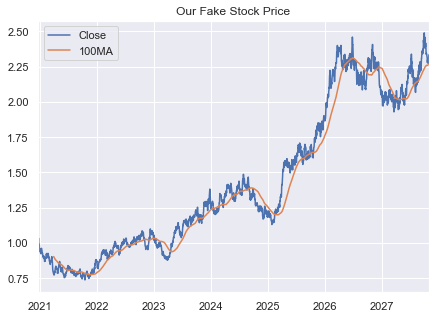

In [7]:
df['100MA'] = df['Close'].rolling(100).mean()
df[['Close','100MA']].plot(figsize=(7,5), title='Our Fake Stock Price')
df.columns

In [ ]:
df['100MAdist'] = -1 + (df['Close'] / df['100MA'])

In [ ]:
f1 = plt.figure(figsize=(7,5))
ax1 = f1.add_subplot(2, 1, 1)
ax2 = f1.add_subplot(2, 1, 2)

df[['Close','100MA']].plot(title='Our Fake Stock Price', ax=ax1, logy=True)
df['100MAdist'].plot(title='Distance from MA', ax=ax2)
plt.tight_layout()

In [ ]:
df['MAsignal'] = np.where(df['Close']>df['100MA'], 1, 0)

In [ ]:
f1 = plt.figure(figsize=(9,6))
ax1 = f1.add_subplot(1, 1, 1)

dfFiltered = df[df['MAsignal']==1]
truedates = dfFiltered.index.tolist()

# truedates = df[df['MAsignal']==1].index.tolist() # one line method

for x in truedates:
  ax1.axvline(x, color='tab:green', alpha = 0.27, linewidth = .25, linestyle='-')

df[['Close','100MA']].plot(title='Our Fake Stock Price', ax=ax1, logy=True)

In [ ]:
df['SignalTrue'] = np.where(df['Close']>df['100MA'], df['Close'], np.NaN)
df['SignalFalse'] = np.where(df['Close']>df['100MA'], np.NaN, df['Close'])

In [ ]:
f1 = plt.figure(figsize=(9,6))
ax1 = f1.add_subplot(1, 1, 1)

df[['SignalTrue','SignalFalse']].plot(title='Our Fake Stock Price', ax=ax1, logy=True)

In [ ]:
f1 = plt.figure(figsize=(9,6))
ax1 = f1.add_subplot(1, 1, 1)

df[['SignalTrue']].plot(title='Our Fake Stock Price', ax=ax1, logy=True)
df[['SignalFalse']].plot(ax=ax1, alpha=0.50, logy=True)

In [ ]:
our_index = pd.date_range(start='2020-12-21', periods=2500*24*2, freq='30T')
df = pd.DataFrame(index = our_index)

R_old = 0.0002
Stdev_old = 0.011

R_new = (1+R_old)**(1/48)-1
Stdev_new = (Stdev_old)*(1**0.5)*((1/48)**0.5)

df['Close'] = np.random.normal(loc=R_new, scale=Stdev_new, size=2500*24*2)
df['Close'] = np.exp(df['Close'])
df['Close'].iloc[0] = 1
df['Close'] = df['Close'].cumprod()
df['Close'].plot(figsize=(7,5))


In [ ]:
df = df.between_time('09:30', '16:00')
df = df['Close'].resample('1D').ohlc()
df.rename(columns={'open': 'Open','high':'High','low':'Low','close':'Close'}, inplace=True)

df.head()

In [ ]:
df['100MA'] = df['Close'].rolling(100).mean()
df['MAsignal'] = np.where(df['Close']>df['100MA'], 1, 0)

condition1 = (df['MAsignal'].shift(1)==1) & (df['MAsignal'].shift(2)==0)
condition2 = (df['MAsignal'].shift(1)==1) & (df['MAsignal'].shift(2)==1)
condition3 = (df['MAsignal'].shift(1)==0) & (df['MAsignal'].shift(2)==1)

df['PortChng'] = 0 # default setting
df['PortChng'] = np.where(condition1, -1 + df['Close']/df['Open'], df['PortChng'])
df['PortChng'] = np.where(condition2, -1 + df['Close']/df['Close'].shift(1), df['PortChng'])
df['PortChng'] = np.where(condition3, -1 + df['Open']/df['Close'].shift(1), df['PortChng'])

df['Port'] = df['PortChng'] + 1
df['Port'] = df['Port'].cumprod()

df['Port'].plot(figsize=(7,5))


In [ ]:
f1 = plt.figure(figsize=(9,6))
ax1 = f1.add_subplot(1, 1, 1)

true_indexvals = df[condition1|condition2|condition3].index.tolist()

for x in true_indexvals:
  ax1.axvline(x, color='tab:green', alpha = 0.22, linewidth = .25, linestyle='-')

df[['Close','Port']].plot(title='Testing the 100MA Strategy', ax=ax1, logy=True)
ax1.legend(loc='upper left')

In [ ]:
BidAskPct = 4/(100*100) # (ask-bid)/ask = 4 basis points
list_cols = ['Open','Close']

for i in list_cols:
  df[i+'Ask'] = (2*df[i])/(2-BidAskPct)
  df[i+'Bid'] = (2*df[i]) - (2*df[i])/(2-BidAskPct)

import re
df.filter(regex='Open|Close').head()


In [ ]:
condition1 = (df['MAsignal'].shift(1)==1) & (df['MAsignal'].shift(2)==0)
condition2 = (df['MAsignal'].shift(1)==1) & (df['MAsignal'].shift(2)==1)
condition3 = (df['MAsignal'].shift(1)==0) & (df['MAsignal'].shift(2)==1)

df['PortChng'] = 0 # default setting
df['PortChng'] = np.where(condition1, -1 + df['Close']/df['OpenAsk'], df['PortChng'])
df['PortChng'] = np.where(condition2, -1 + df['Close']/df['Close'].shift(1), df['PortChng'])
df['PortChng'] = np.where(condition3, -1 + df['OpenBid']/df['Close'].shift(1), df['PortChng'])

df['Port'] = df['PortChng'] + 1
df['Port'] = df['Port'].cumprod()

f1 = plt.figure(figsize=(9,6))
ax1 = f1.add_subplot(1, 1, 1)

true_indexvals = df[condition1|condition2|condition3].index.tolist()

for x in true_indexvals:
  ax1.axvline(x, color='tab:green', alpha = 0.22, linewidth = .25, linestyle='-')

df[['Close','Port']].plot(title='Testing the 100MA Strategy', ax=ax1, logy=True)
ax1.legend(loc='upper left')
